<a href="https://colab.research.google.com/github/Nsi20/Restaurant-Ratings/blob/main/Another_copy_of_Level_3_task_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

df.head()


Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:

print(df.isnull().sum())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])


In [ ]:
print(df['Cuisines'].isnull().sum())

0


# **LEVEL 3**
# **Task 1: Predictive Modeling**

- Build a regression model to predict the
aggregate rating of a restaurant based on
available features.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Preprocessing

# Droping rows with missing values in important columns
df_cleaned = df_cleaned.dropna(subset=['Aggregate rating', 'Price range', 'Votes', 'Average Cost for two'])

# Converting categorical variables into numeric values using Label Encoding
le = LabelEncoder()

# Encoding categorical features: 'Has Table booking', 'Has Online delivery', 'City', 'Cuisines'
df_cleaned['Has Table booking'] = le.fit_transform(df_cleaned['Has Table booking'])
df_cleaned['Has Online delivery'] = le.fit_transform(df_cleaned['Has Online delivery'])
df_cleaned['City'] = le.fit_transform(df_cleaned['City'])
df_cleaned['Cuisines'] = le.fit_transform(df_cleaned['Cuisines'])

# Step 2: Feature Selection

# seleting the features that may influence the aggregate rating
features = ['Price range', 'Votes', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'City', 'Cuisines']
X = df_cleaned[features]

# Targeting variable is 'Aggregate rating'
y = df_cleaned['Aggregate rating']

# Step 3: Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Building the Model - Using Linear Regression for simplicity
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Step 5: Evaluating the Model

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

print("Model coefficients:", model.coef_)


Mean Squared Error (MSE): 1.65
R-squared (R²): 0.27
Model coefficients: [ 6.35732324e-01  6.49543884e-04  1.32658690e-06 -1.94216895e-01
  6.49036094e-01 -5.29583928e-03 -1.83613852e-04]


- Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Preprocessing

# Drop rows with missing values in important columns
df_cleaned = df_cleaned.dropna(subset=['Aggregate rating', 'Price range', 'Votes', 'Average Cost for two'])

# Convert categorical variables into numeric values using Label Encoding
le = LabelEncoder()

# Encoding categorical features: 'Has Table booking', 'Has Online delivery', 'City', 'Cuisines'
df_cleaned['Has Table booking'] = le.fit_transform(df_cleaned['Has Table booking'])
df_cleaned['Has Online delivery'] = le.fit_transform(df_cleaned['Has Online delivery'])
df_cleaned['City'] = le.fit_transform(df_cleaned['City'])
df_cleaned['Cuisines'] = le.fit_transform(df_cleaned['Cuisines'])

# Step 2: Feature Selection

# Select the features that may influence the aggregate rating
features = ['Price range', 'Votes', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'City', 'Cuisines']
X = df_cleaned[features]

# Target variable is 'Aggregate rating'
y = df_cleaned['Aggregate rating']

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Model - Using Linear Regression for simplicity
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the Model

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

print("Model coefficients:", model.coef_)


Mean Squared Error (MSE): 1.65
R-squared (R²): 0.27
Model coefficients: [ 6.35732324e-01  6.49543884e-04  1.32658690e-06 -1.94216895e-01
  6.49036094e-01 -5.29583928e-03 -1.83613852e-04]


- Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Preprocessing

# Drop rows with missing values in important columns
df_cleaned = df_cleaned.dropna(subset=['Aggregate rating', 'Price range', 'Votes', 'Average Cost for two'])

# Convert categorical variables into numeric values using Label Encoding
le = LabelEncoder()

# Encoding categorical features: 'Has Table booking', 'Has Online delivery', 'City', 'Cuisines'
df_cleaned['Has Table booking'] = le.fit_transform(df_cleaned['Has Table booking'])
df_cleaned['Has Online delivery'] = le.fit_transform(df_cleaned['Has Online delivery'])
df_cleaned['City'] = le.fit_transform(df_cleaned['City'])
df_cleaned['Cuisines'] = le.fit_transform(df_cleaned['Cuisines'])

# Step 2: Feature Selection

# Select the features that may influence the aggregate rating
features = ['Price range', 'Votes', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'City', 'Cuisines']
X = df_cleaned[features]

# Target variable is 'Aggregate rating'
y = df_cleaned['Aggregate rating']

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Step 5: Train and Evaluate Models

# Dictionary to store model performance
model_performance = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results in the dictionary
    model_performance[name] = {
        "Mean Squared Error (MSE)": mse,
        "R-squared (R²)": r2
    }

# Step 6: Print out the comparison of models
for model_name, metrics in model_performance.items():
    print(f"\nModel: {model_name}")
    print(f"Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']:.2f}")
    print(f"R-squared (R²): {metrics['R-squared (R²)']:.2f}")



Model: Linear Regression
Mean Squared Error (MSE): 1.65
R-squared (R²): 0.27

Model: Decision Tree
Mean Squared Error (MSE): 0.19
R-squared (R²): 0.91

Model: Random Forest
Mean Squared Error (MSE): 0.10
R-squared (R²): 0.95


# **Task 2: Customer Preference Analysis**

- Analyze the relationship between the type of
cuisine and the restaurant's rating.

<ipython-input-35-eb6c248a26dc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_rating, palette='viridis')


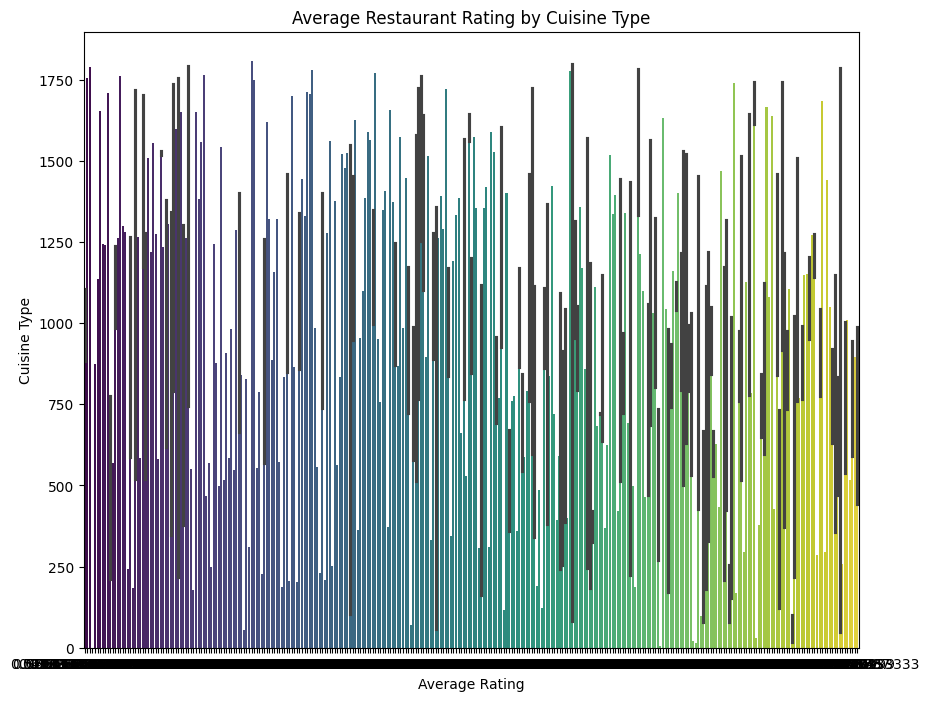

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean the 'Cuisines' column by dropping any rows with missing values
df_cleaned_cuisine = df_cleaned.dropna(subset=['Cuisines', 'Aggregate rating'])

# Step 2: Group by 'Cuisines' and calculate the average rating for each cuisine type
cuisine_rating = df_cleaned_cuisine.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by rating for better visualization
cuisine_rating = cuisine_rating.sort_values(by='Aggregate rating', ascending=False)

# Step 3: Visualize the relationship using a bar plot

plt.figure(figsize=(10, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_rating, palette='viridis')
plt.title('Average Restaurant Rating by Cuisine Type')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()


- Identify the most popular cuisines among
customers based on the number of votes.

<ipython-input-37-9a6b6e79e59e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes', y='Cuisines', data=cuisine_popularity.head(10), palette='coolwarm')


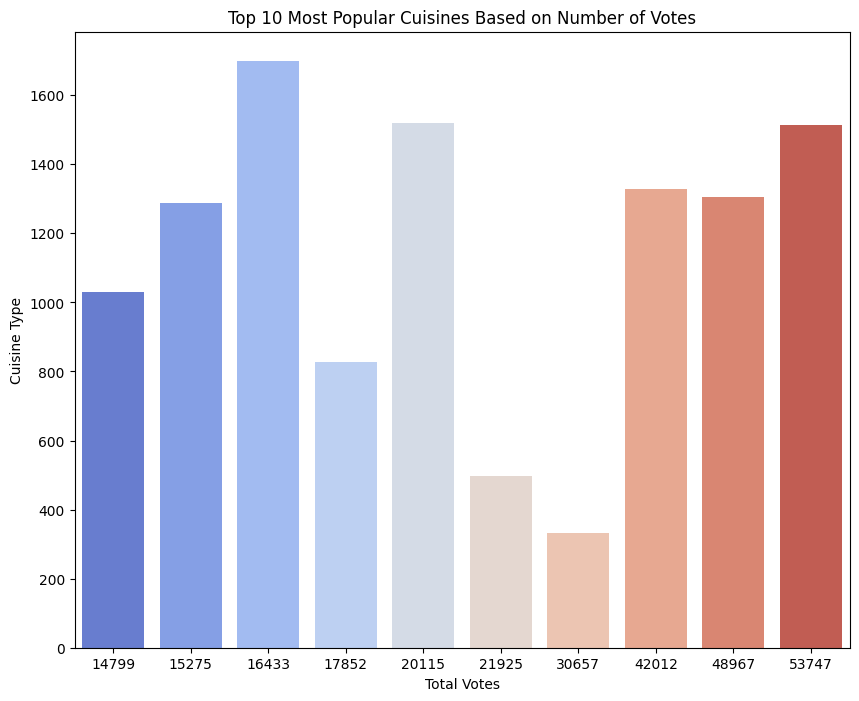

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean the data by dropping rows with missing values in 'Cuisines' or 'Votes'
df_cleaned_votes = df_cleaned.dropna(subset=['Cuisines', 'Votes'])

# Step 2: Group by 'Cuisines' and sum the 'Votes' for each cuisine type
cuisine_popularity = df_cleaned_votes.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort by the total number of votes in descending order
cuisine_popularity = cuisine_popularity.sort_values(by='Votes', ascending=False)

# Step 3: Visualize the top 10 most popular cuisines based on votes

plt.figure(figsize=(10, 8))
sns.barplot(x='Votes', y='Cuisines', data=cuisine_popularity.head(10), palette='coolwarm')
plt.title('Top 10 Most Popular Cuisines Based on Number of Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine Type')
plt.show()


- Determine if there are any specific cuisines
that tend to receive higher ratings.

<ipython-input-38-31dbe7c90d51>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(10), palette='viridis')


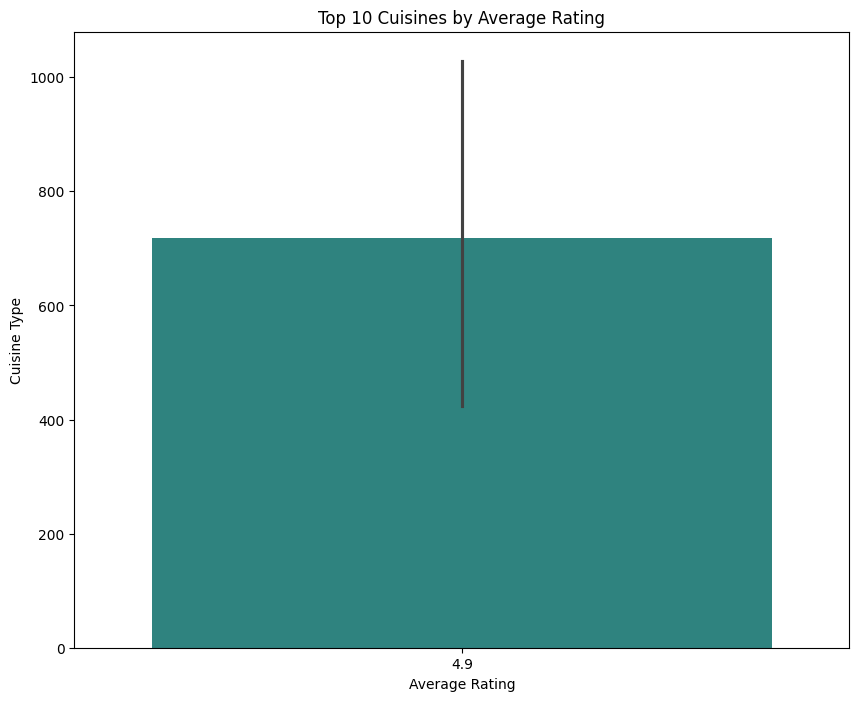

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean the data by dropping rows with missing values in 'Cuisines' or 'Aggregate rating'
df_cleaned_ratings = df_cleaned.dropna(subset=['Cuisines', 'Aggregate rating'])

# Step 2: Group by 'Cuisines' and calculate the average rating for each cuisine type
cuisine_ratings = df_cleaned_ratings.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by the average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Step 3: Visualize the top 10 cuisines by average rating

plt.figure(figsize=(10, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(10), palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()


# ** Task 3: Data Visualization**

- Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).

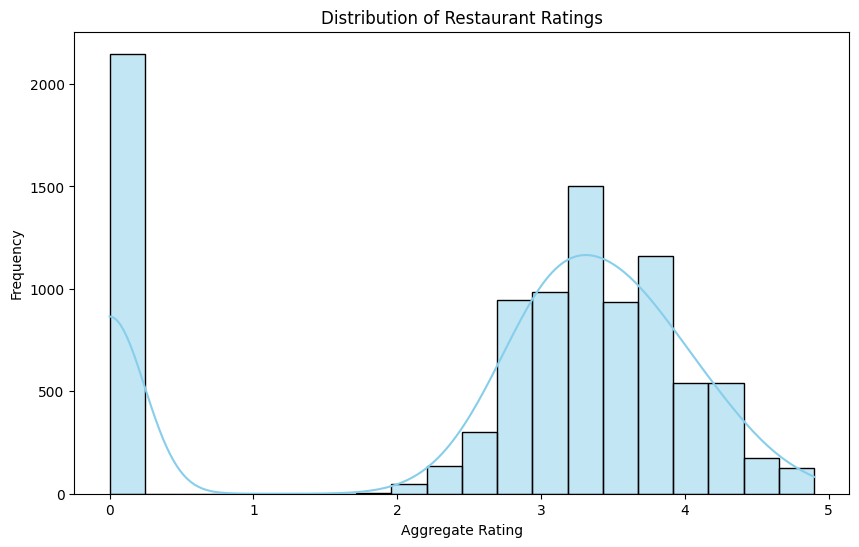

<ipython-input-39-0ca8524d260e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aggregate rating', data=df_cleaned_ratings, palette='coolwarm')


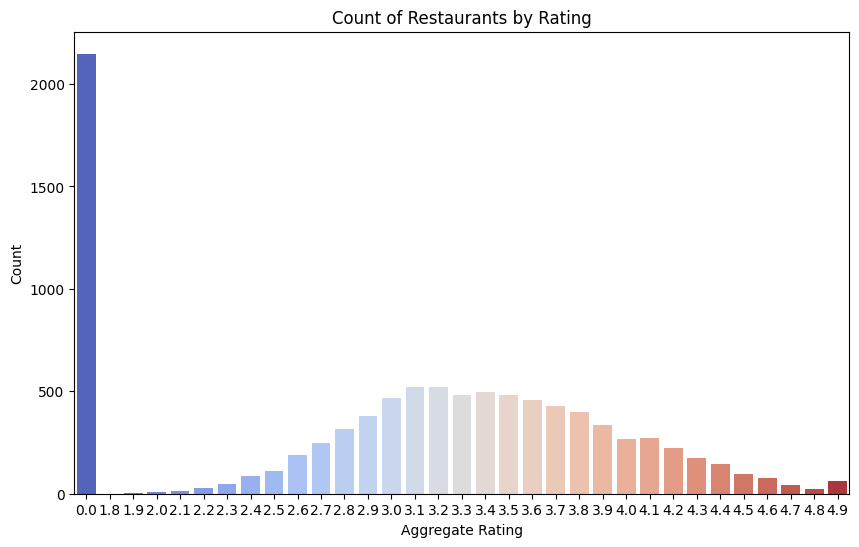

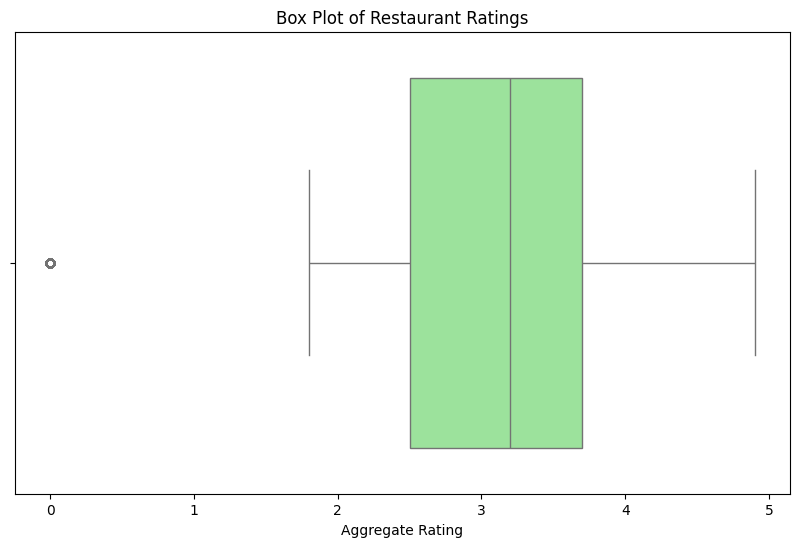

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data to ensure we only have valid ratings
df_cleaned_ratings = df_cleaned.dropna(subset=['Aggregate rating'])

# Step 2: Histogram - Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_ratings['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Step 3: Bar Plot - Count of restaurants for each rating
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=df_cleaned_ratings, palette='coolwarm')
plt.title('Count of Restaurants by Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

# Step 4: Box Plot - Distribution of ratings with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aggregate rating', data=df_cleaned_ratings, color='lightgreen')
plt.title('Box Plot of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.show()


- Compare the average ratings of different cuisines
or cities using appropriate visualizations.

<ipython-input-40-293238dd7121>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_avg_rating.head(10), palette='viridis')


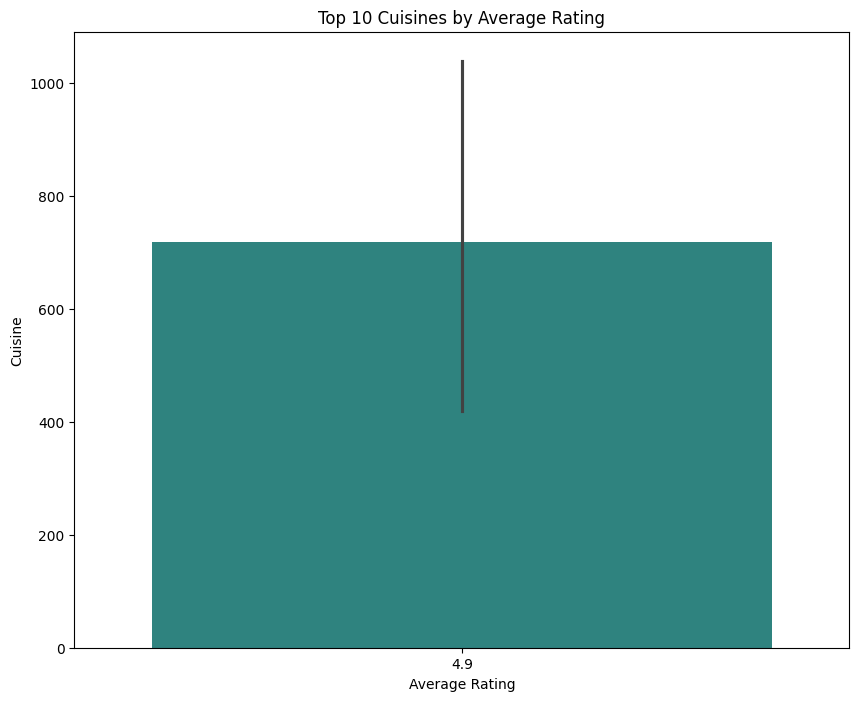

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean the data by dropping rows with missing values in 'Cuisines' or 'Aggregate rating'
df_cleaned_ratings = df_cleaned.dropna(subset=['Cuisines', 'Aggregate rating'])

# Step 2: Group by 'Cuisines' and calculate the average rating
cuisine_avg_rating = df_cleaned_ratings.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by the average rating in descending order
cuisine_avg_rating = cuisine_avg_rating.sort_values(by='Aggregate rating', ascending=False)

# Step 3: Visualize the comparison of average ratings for cuisines using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_avg_rating.head(10), palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


<ipython-input-41-480bb33f427b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='City', data=city_avg_rating.head(10), palette='coolwarm')


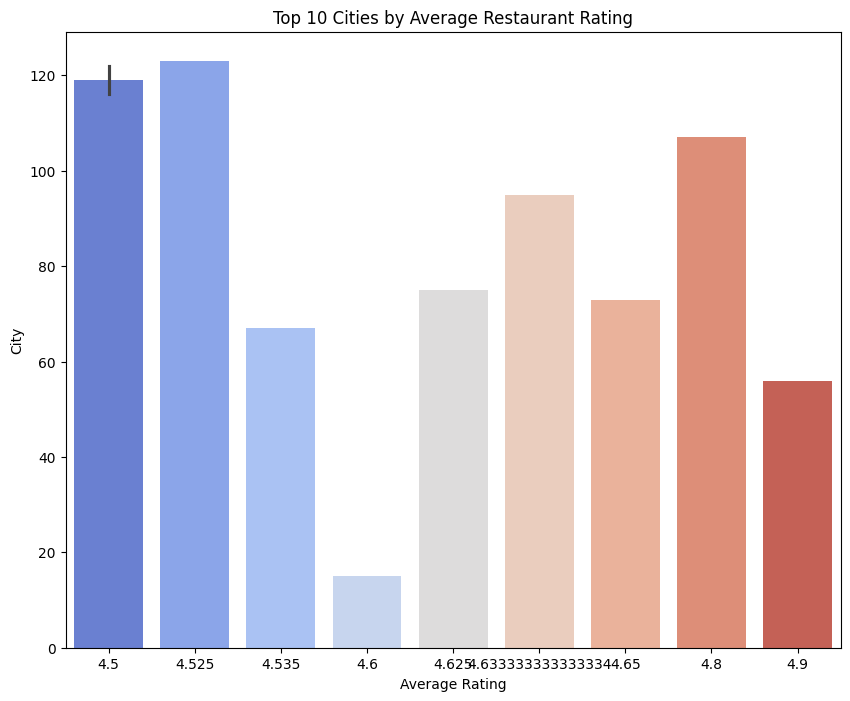

In [ ]:
# Step 1: Clean the data by dropping rows with missing values in 'City' or 'Aggregate rating'
df_cleaned_ratings_city = df_cleaned.dropna(subset=['City', 'Aggregate rating'])

# Step 2: Group by 'City' and calculate the average rating
city_avg_rating = df_cleaned_ratings_city.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by the average rating in descending order
city_avg_rating = city_avg_rating.sort_values(by='Aggregate rating', ascending=False)

# Step 3: Visualize the comparison of average ratings for cities using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Aggregate rating', y='City', data=city_avg_rating.head(10), palette='coolwarm')
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


<ipython-input-42-55287d61ce6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Aggregate rating', y='Cuisines', data=df_cleaned_ratings, palette='Set2')


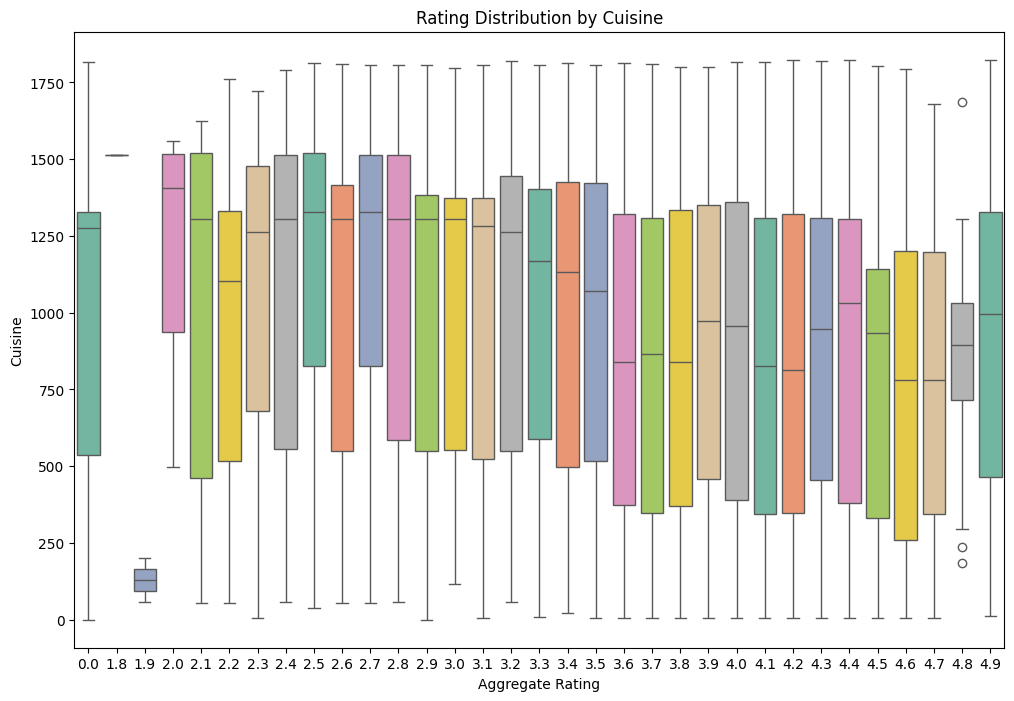

In [ ]:
# Step 4: Box plot to show the distribution of ratings for each cuisine
plt.figure(figsize=(12, 8))
sns.boxplot(x='Aggregate rating', y='Cuisines', data=df_cleaned_ratings, palette='Set2')
plt.title('Rating Distribution by Cuisine')
plt.xlabel('Aggregate Rating')
plt.ylabel('Cuisine')
plt.show()


<ipython-input-43-6b38df55665c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Aggregate rating', y='City', data=df_cleaned_ratings_city, palette='Set3')


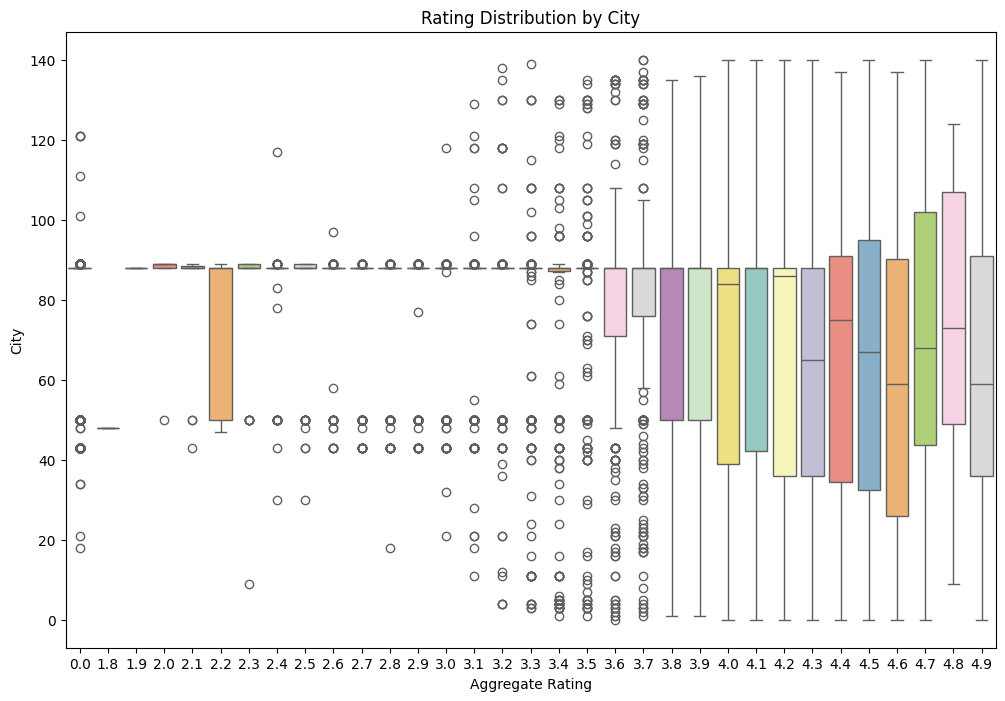

In [ ]:
# Step 5: Box plot to show the distribution of ratings for each city
plt.figure(figsize=(12, 8))
sns.boxplot(x='Aggregate rating', y='City', data=df_cleaned_ratings_city, palette='Set3')
plt.title('Rating Distribution by City')
plt.xlabel('Aggregate Rating')
plt.ylabel('City')
plt.show()


- Visualize the relationship between various
features and the target variable to gain insights.

<ipython-input-45-e1c17fe98307>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df_cleaned, palette='Set2')


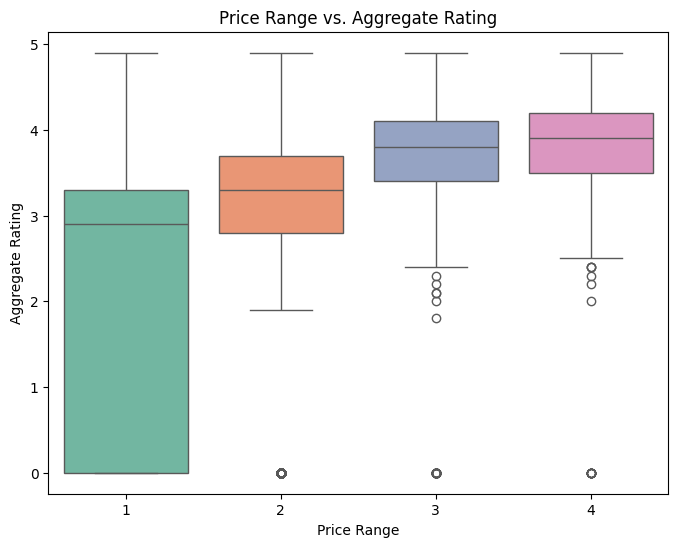

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot: Price range vs Aggregate rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df_cleaned, palette='Set2')
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


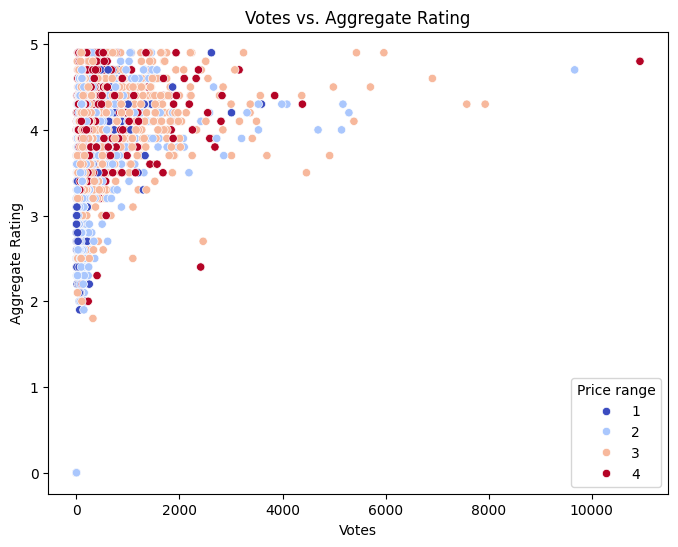

In [ ]:
# Scatter plot: Votes vs Aggregate rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df_cleaned, hue='Price range', palette='coolwarm')
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()


<ipython-input-47-13a6c86ff845>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df_cleaned, palette='Set3')


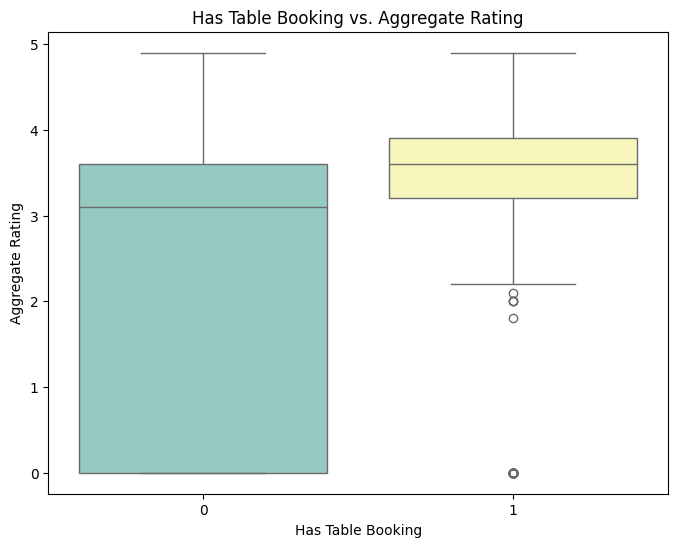

In [ ]:
# Box plot: Has table booking vs Aggregate rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df_cleaned, palette='Set3')
plt.title('Has Table Booking vs. Aggregate Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()


<ipython-input-48-41e315bd7480>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(10), palette='viridis')


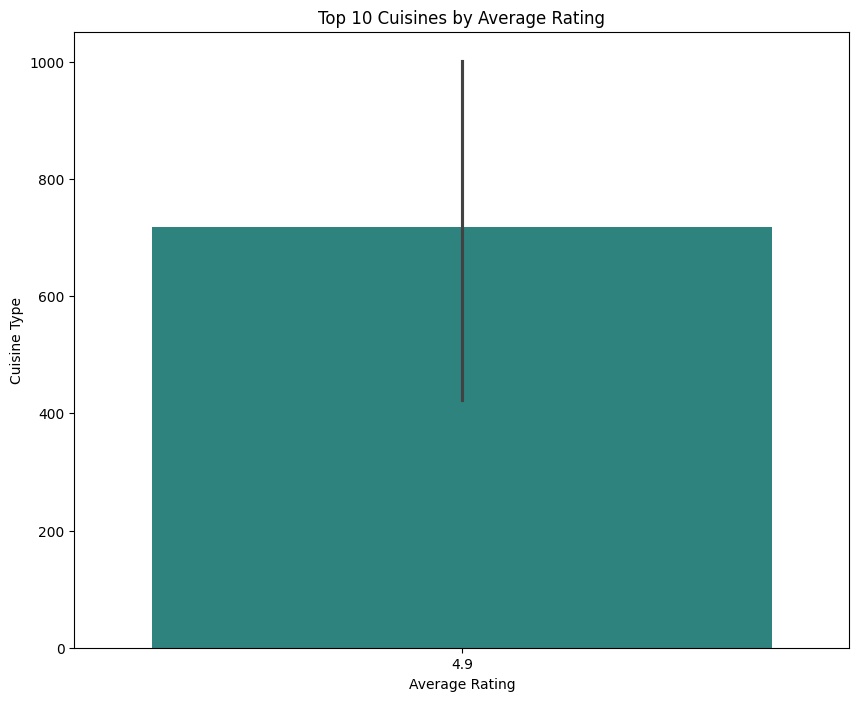

In [ ]:
# Bar plot: Cuisine type vs Aggregate rating
cuisine_ratings = df_cleaned.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(10), palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()
